# Project 3: CRISP-DM Capston: 
## MSDS 7331 Data Mining Section 404
## 7/9/2017

### Chris Irwin, Damon Resnick, Josh Klein, Anna Frowein

## Introduction

Pick an option:

    - A: Clustering on an unlabeled dataset to provide insight or fatures
    - B: Use Transaction data for mining associations rules
    - C: Use collaborative filtering to buid a custom recommendation system
    
## Business Understanding (10 points)

    - Purpose of the data
    - Meaure the effectiveness of a good algorithm
        - how does this make sense for data
        - and how does this make sense for stakeholders
        
## Data Understanding (20 points)

### Part 1 (10 points)

    -  meaning and type of data
     - data quality
         - missing values
         - duplicate data
         - outlies
     - How we deal with these issues
     
### Part 2 (10 points)

    - Visualize important attributes
    - Interpretation of all charts and graphs
    - NO Required number
    
## Modeling and Evaluation (50 points)
Details for each of the following subsections differ depending on the option we choose. I will fill in the detail when we pick an option

### Train and adjust parameters (10 points)

### Evaluate and Compare (10 points)

### Visualize Results (10 points)

### Summarize the Ramificaitons (20 points)

## Deployment (10 points)

    - Did we achieve goals
    - How useful is modle for interested parties
    - How would we deploy model
    - What other data should be collected
    - How often should model be updated

## Exceptional Work (10 points)



In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#LinearRegression 
from sklearn.linear_model import LinearRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import StratifiedKFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
#dfAttributeData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 
dfAttributeData = pd.read_csv('/Users/joshuaklein/Desktop/properties_2016.csv')

#dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')
dfTrainingData = pd.read_csv('/Users/joshuaklein/Desktop/train_2016_v2.csv')

#Create new data set that contains both the data zillow and the data to train against
dfZillowData = pd.merge(dfTrainingData, dfAttributeData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfAttributeData


#Get the headers to ensure all columns are included.
dfZillowData.head(10)

/Users/joshuaklein/anaconda/envs/gl-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [2]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2', 'pooltypeid10']].where(dfZillowData[['hashottuborspa','pooltypeid2','pooltypeid10']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angeles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

#Need to transform Tax Value because of large outliers
dfZillowData['log10TaxValue'] = np.log10(dfZillowData['taxvaluedollarcnt'])

#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan)

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))
#Second Row #,0.#,'garagecarcnt'
#Set Column Name
dfColumns.columns = ['updatevalue']

#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#storytypeid
dummies = pd.get_dummies(dfForModel['storytypeid']).rename(columns=lambda x: 'StoryTypeId' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['storytypeid'], inplace=True, axis=1)

#Create Function for County Rename
def garagecnt(row):
    if row['garagecarcnt'] > 0:
        val = 1
    else:
        val = 0
    return val

dfForModel['hasgarage'] = dfForModel.apply(garagecnt, axis=1)

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

dfZillowDataNumeric.head(10)

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_275.0,StoryTypeId7.0,StoryTypeId24.0,hasgarage
0,11016594,0.0276,1.0,7.0,0.0,2.0,3.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,0,1,1
1,14366692,-0.1684,5.0,7.0,0.0,3.5,4.0,4.0,7.0,3.5,...,0,0,0,0,0,0,0,0,1,1
2,12098116,-0.0040,1.0,7.0,0.0,3.0,2.0,4.0,4.0,3.0,...,0,0,0,0,0,0,0,0,1,1
3,12643413,0.0218,1.0,7.0,0.0,2.0,2.0,4.0,4.0,2.0,...,0,0,0,1,0,0,0,0,1,1
4,14432541,-0.0050,5.0,7.0,0.0,2.5,4.0,4.0,7.0,2.5,...,0,0,0,0,0,0,0,0,1,1
5,11509835,-0.2705,1.0,7.0,0.0,4.0,4.0,4.0,1.0,4.0,...,0,0,0,0,0,0,0,0,1,1
6,12286022,0.0440,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0,0,0,0,0,0,0,0,1,1
7,17177301,0.1638,5.0,7.0,0.0,2.5,3.0,4.0,7.0,2.5,...,0,0,0,1,0,0,0,0,1,1
8,14739064,-0.0030,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0,0,0,1,0,0,0,0,1,1
9,14677559,0.0843,5.0,7.0,0.0,2.0,2.0,4.0,7.0,2.0,...,0,0,0,1,0,0,0,0,1,1


In [3]:
#Create data set that has all original values from the file.
#Every Zillow value with a real garage car count
dfTrainValues = dfZillowData[['parcelid']][~(dfZillowData['garagecarcnt'].isnull())]

#Get values for dfForModel 
dfTrainValues = pd.merge(dfTrainValues, dfForModel, on='parcelid', how='left')

#Create Numeric Dataframe only for PCA and Classification.
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfTrainValues)

#Create Numeric Only Dataframe
dfTrainValuesNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

#Number of iterations
num_cv_iterations = 5
#Create Cross Validation objects using folds
cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

print('Cross Validation Object is created')

Cross Validation Object is created


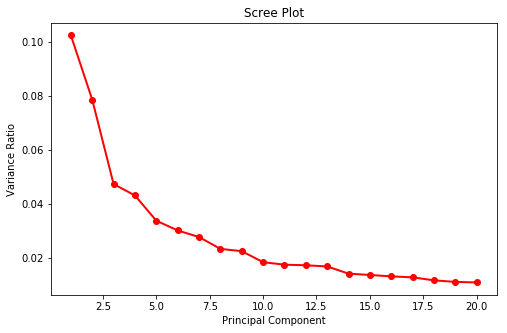

In [6]:
ZillowDataPCA = dfZillowDataNumeric

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObj.fit(ZillowDataPCA) 

# to transform new feature data
# apply to training
ZillowData_scaled = stdsclrObj.transform(ZillowDataPCA)

components = 20

pca = PCA(n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowData_scaled).transform(ZillowData_scaled) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

## Column Selection
Using PCA we see that while looking at the first 15 Principal Components we use an absolute value of .05 in order to see which columns are considered to be most important. This is important for us to be able to remove a large amount of noise due to the dataset having a total of 114 columns. After the analysis, we can see that the number of columns is reduced to only 26, which we will try different types of Clustering to try and get a deeper understanding of the data.

In [80]:

import sklearn.datasets as ds

pca_components = pca.components_

compValues = pd.DataFrame(pca_components,columns=ZillowDataPCA.columns)

#show top 13 vectors due to the analysis 
compValues = compValues[compValues.index <= 15]

compValuesTransformed = compValues.T

ColumnsAndValues = []

dfColumns = pd.DataFrame([])

for compValue in compValuesTransformed:
    i = 0 
    ColumnsAndValues = compValuesTransformed[i].loc[abs(compValuesTransformed[i]) > .05]
    for columns in ColumnsAndValues.index:
        if columns != 'parcelid':
            dfColumns = dfColumns.append([columns])
            #print columns
    i = i + 1

dfClustering = pd.DataFrame([])

#Reset Index from removing data
dfColumns = dfColumns.drop_duplicates([0], keep='last').reset_index(drop=True)

for columnNames in dfColumns[0]:
    dataValues = dfZillowDataNumeric[[columnNames]]
    dfClustering[columnNames] = pd.DataFrame(dataValues, index=dataValues.index)
    #dfClustering[columnNames] = dfClustering.add(dfZillowDataNumeric[[columnNames][0]])

print(len(dfClustering.columns))
print(dfClustering.columns)


26
Index([u'airconditioningtypeid', u'buildingqualitytypeid',
       u'finishedfloor1squarefeet', u'finishedsquarefeet50', u'fips',
       u'fireplacecnt', u'fullbathcnt', u'garagetotalsqft',
       u'heatingorsystemtypeid', u'latitude', u'rawcensustractandblock',
       u'regionidcounty', u'roomcnt', u'unitcnt', u'numberofstories',
       u'censustractandblock', u'haspatio', u'HSTypeId_2.0', u'HSTypeId_13.0',
       u'ACTypeId_1.0', u'ACTypeId_5.0', u'ACTypeId_13.0',
       u'BuildingQualTypeId_1.0', u'BuildingQualTypeId_4.0',
       u'BuildingQualTypeId_7.0', u'LandUseTypeId_269.0'],
      dtype='object')


## Creating Clustering 
After creating a new clustering data set with what is considered the most important columns according to PCA we can now begin the process of running multiple clustering functions. This is showing that we are trying to predict the values of Region by using Full Bath Count and Room count. We are using random forests to create a baseline value to compare against. Additionally, we choose 3 groupings because in the data set there are 3 distinct counties in which properties can be found.

In [14]:
#Creating Baseline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

groupingCnt = 3

y = dfClustering['regionidcounty']

X = dfClustering[['finishedfloor1squarefeet','fullbathcnt','roomcnt']]

rFCLF = RandomForestClassifier(n_estimators=groupingCnt,random_state=1)

acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Average accuracy = ', 87.695322653660781, '+-', 0.081340361866189176)


We can see that by using the most common attributes when home buying Finished Square feet, bath count and room count we have a base line accuracy of 87.69% when attempting to predict one of the three counties that this data set might contain.

In [66]:
#Creating Baseline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

groupingCnt = 3

y = dfClustering['regionidcounty']

X = dfClustering[['finishedfloor1squarefeet','roomcnt']]

rFCLF = RandomForestClassifier(n_estimators=groupingCnt,random_state=1)

acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Average accuracy = ', 87.699731395764019, '+-', 0.25356188301614174)


In taking a deeper look at the data we wondered what type of effect full bath count on the accuracy. Below we can see that by removing the full bath count variable there is actually a very small increase in accuracy, but there is also a very small increase in variance. We felt that the increase in variance was not enough to truly affect the outcome and choose to remove the variables for the remainder of the analysis. Below you can see a scatter plot that shows the values of finished square footage versus home room count. In order to help with creating a better view we added some addition randomization in order to allow the clustering to better show. The differences can be seen between the two graphs below. The original graph on the right versus the left, which has had random noise added to the points.  

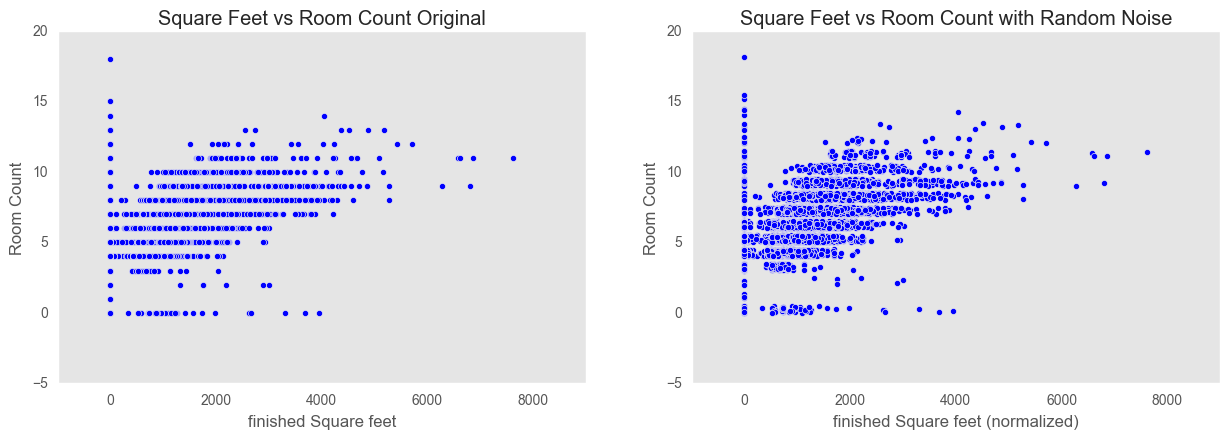

In [33]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = dfClustering[['roomcnt','finishedfloor1squarefeet']].values



f, ax = plt.subplots(figsize=(15, 10))

f.title = plt.title("Initialization and Clustering Effect on Std Dev")

plt.subplot(2,2,1)
plt.scatter(X1[:, 1], X1[:, 0], s=20)
plt.xlabel('finished Square feet'), plt.ylabel('Room Count')
plt.grid()
plt.title('Square Feet vs Room Count Original')

plt.subplot(2,2,2)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, s=20)
plt.xlabel('finished Square feet (normalized)'), plt.ylabel('Room Count')
plt.grid()
plt.title('Square Feet vs Room Count with Random Noise')
plt.show()


Below we run KMeans clustering multiple times in order to see what combination of cluster count and which initialization would create the best accuracy. We randomly chose between 3 and 10 clusters, but were limited to two methods of initialization, which are K-means++ and Random. 

- Need to explain what KMeans and Random are....

In [63]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

dfKmeansValues = pd.DataFrame(columns=('init', 'groupingCnt', 'accuracy', 'StdDev'))

for init in ('random', 'k-means++'):
    for groupingCnt in range(3,11):
        cls = KMeans(n_clusters=groupingCnt, init=init,random_state=1)
        cls.fit(X1)
        newfeature = cls.labels_ # the labels from kmeans clustering
        
        acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)
        
        dfKmeansValues = dfKmeansValues.append(pd.DataFrame({'init': init
                                                            ,'groupingCnt':groupingCnt
                                                            ,'accuracy':acc.mean()*100
                                                            ,'StdDev':acc.std()*100}, index=[0]), ignore_index=True)   

        print ("Average accuracy (with ", init," and ", groupingCnt , "number of clusters for finished Sqft/Bedrooms)= ", acc.mean()*100, "+-", acc.std()*100)
        
print('Values Created')      

('Average accuracy (with ', 'random', ' and ', 3, 'number of clusters for finished Sqft/Bedrooms)= ', 87.699726606091374, '+-', 0.13098293899808985)
('Average accuracy (with ', 'random', ' and ', 4, 'number of clusters for finished Sqft/Bedrooms)= ', 87.699726606091374, '+-', 0.11368557214083742)
('Average accuracy (with ', 'random', ' and ', 5, 'number of clusters for finished Sqft/Bedrooms)= ', 87.697525114906199, '+-', 0.10386575279868486)
('Average accuracy (with ', 'random', ' and ', 6, 'number of clusters for finished Sqft/Bedrooms)= ', 87.696424520885557, '+-', 0.28668103491839064)
('Average accuracy (with ', 'random', ' and ', 7, 'number of clusters for finished Sqft/Bedrooms)= ', 87.699730910733876, '+-', 0.18317617601023897)
('Average accuracy (with ', 'random', ' and ', 8, 'number of clusters for finished Sqft/Bedrooms)= ', 87.699728546211944, '+-', 0.096246082784847142)
('Average accuracy (with ', 'random', ' and ', 9, 'number of clusters for finished Sqft/Bedrooms)= ', 87.

# Additional Parameters
If we need additional parameters I will add another loop so we can run everything as expected. It doesnt take that long so if we decide we want to explain another variable let me know

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

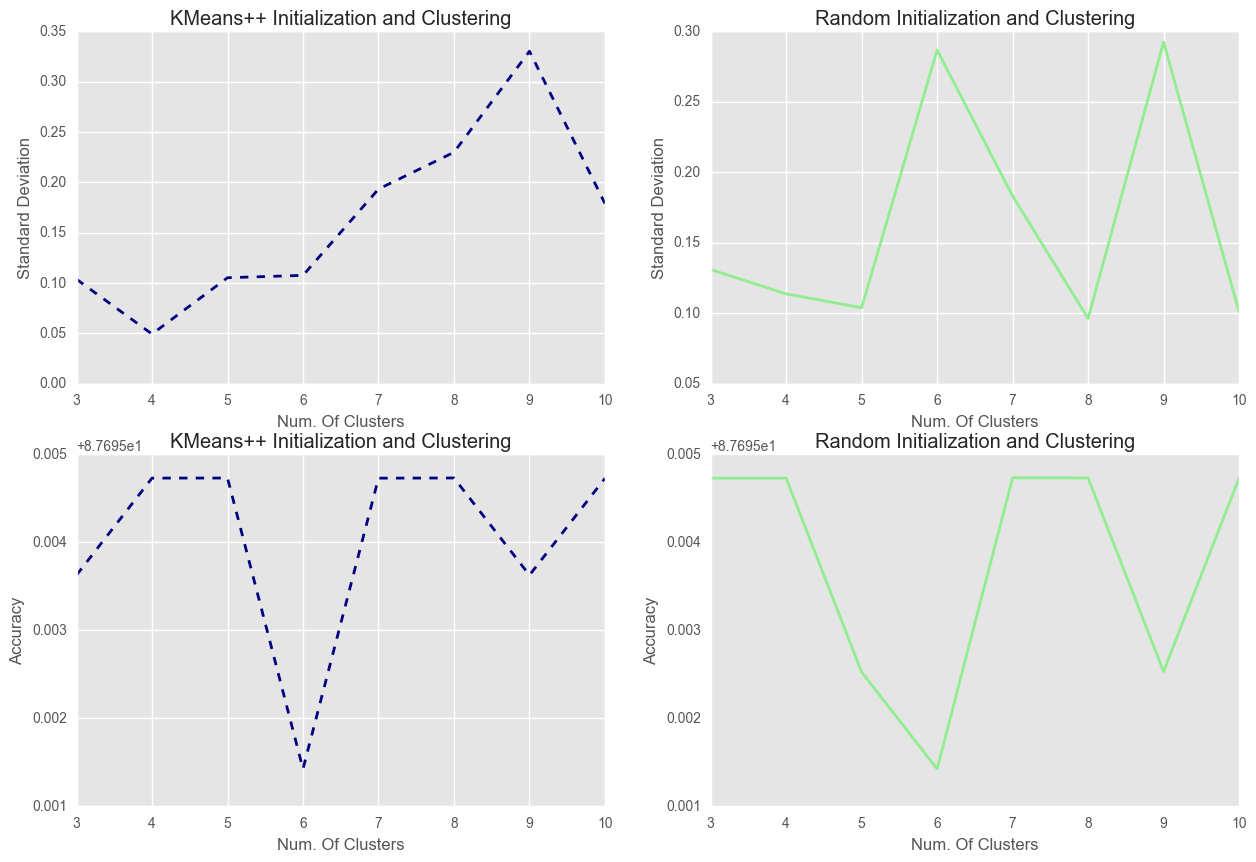

In [67]:
#Craete Random DataFrame
dfKmeansRandomValues = dfKmeansValues.loc[dfKmeansValues['init'] == 'random']

#Create Kmean++ Dataframe
dfKmeansPlusValues = dfKmeansValues.loc[dfKmeansValues['init'] == 'k-means++']

#Create Graphs

f, ax = plt.subplots(figsize=(15, 10))

f.title = plt.title("Initialization and Clustering Effect on Std Dev")

plt.subplot(2,2,1)
plt.ylabel('Standard Deviation')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('KMeans++ Initialization and Clustering')
plt.plot(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.StdDev, '--', color='navy', linewidth=2,label='KMeans++')
for xy in zip(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.StdDev):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.subplot(2,2,2)
plt.ylabel('Standard Deviation')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('Random Initialization and Clustering')
plt.plot(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.StdDev, color='lightgreen', linewidth=2,label='Random')
for xy in zip(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.StdDev):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    
plt.subplot(2,2,3)
plt.ylabel('Accuracy')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('KMeans++ Initialization and Clustering')
plt.plot(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.accuracy, '--', color='navy', linewidth=2,label='KMeans++')
for xy in zip(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.accuracy):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.subplot(2,2,4)
plt.ylabel('Accuracy')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('Random Initialization and Clustering')
plt.plot(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.accuracy, color='lightgreen', linewidth=2,label='Random')
for xy in zip(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.accuracy):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    
plt.grid()
plt.show()




## What should we use?
It looks like based on graphs above that an initialization value of Random gives us a more consistent accuracy across multiple clusters with differences in standard deviation. Also based on a combination of accuracy and standard deviation we found that 8 clusters were the best overall performer.  

## Additional Attributes
In looking at other attributes that could help improve the accuracy of our Random clustering we found that we could try different algorithms when creating clusters. In turn, we completed an additional experiment using 8 clusters and random initialization to see if using one of the three different algorithms available to us created a better overall accuracy. 

The three algorithms are-
Can we get an explanation of each?
- Also just want to point out what the standard is, which is Auto.

- “auto”
- “full” 
- “elkan”

In [68]:
dfKmeansValuesWithAlgo = pd.DataFrame(columns=('init', 'algorithm', 'groupingCnt', 'accuracy', 'StdDev'))

init = 'random'
groupingCnt = 8

for algo in ('auto', 'full', 'elkan'):
    cls = KMeans(n_clusters=groupingCnt, init=init,random_state=1, algorithm = algo)
    cls.fit(X1)
    newfeature = cls.labels_ # the labels from kmeans clustering

    acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

    dfKmeansValuesWithAlgo = dfKmeansValuesWithAlgo.append(pd.DataFrame({'init': init
                                                                        ,'algorithm':algo
                                                                        ,'groupingCnt':groupingCnt
                                                                        ,'accuracy':acc.mean()*100
                                                                        ,'StdDev':acc.std()*100}, index=[0]), ignore_index=True)   

            #print ("Average accuracy (with ", init," and ", groupingCnt , "number of clusters for finished Sqft/Bedrooms)= ", acc.mean()*100, "+-", acc.std()*100)
        
print('Values Created') 

Values Created


In [69]:
print(dfKmeansValuesWithAlgo)

     StdDev   accuracy algorithm  groupingCnt    init
0  0.137838  87.699729      auto          8.0  random
1  0.085699  87.695324      full          8.0  random
2  0.130389  87.699730     elkan          8.0  random


After altering the algorithm, we found that the Elkan algorithm showed the ability to lower the standard deviation when compared to the initial random forest values. Overall, we did not see a large change in the overall accuracy from the baseline, which was created using random forests. 

- Need for fluff for why it might not of been useful?

# What do the clusters look like?

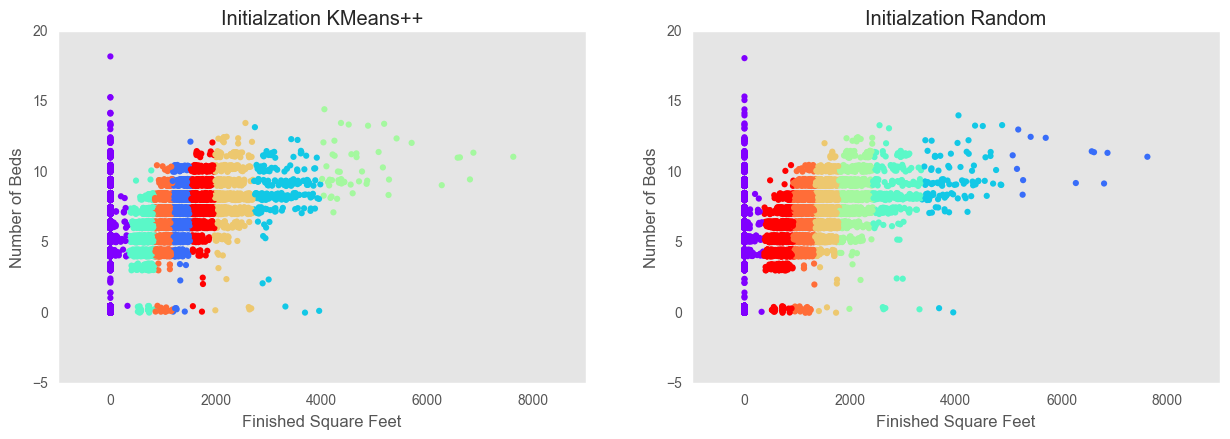

In [81]:
cls_ClustersKMeans = KMeans(n_clusters=groupingCnt, init='k-means++',random_state=1, algorithm =  'elkan')
cls_ClustersKMeans.fit(X1)
newfeature_RoomsKMeans = cls_ClustersKMeans.labels_ # the labels from kmeans clustering


cls_ClustersRandom = KMeans(n_clusters=groupingCnt, init='random',random_state=1, algorithm =  'elkan')
cls_ClustersRandom.fit(X1)
newfeature_RoomsRandom = cls_ClustersRandom.labels_ # the labels from kmeans clustering

#Create Graph
f, ax = plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_RoomsKMeans, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.title('Initialzation KMeans++')
plt.xlabel('Finished Square Feet'), plt.ylabel('Number of Beds')
plt.grid()
plt.plot()

plt.subplot(2,2,2)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_RoomsRandom, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.title('Initialzation Random')
plt.xlabel('Finished Square Feet'), plt.ylabel('Number of Beds')
plt.plot()

plt.grid()
plt.show()


# Exceptional Work

In [70]:
import graphlab as gl

dfZillowDataNumeric2 = dfZillowDataNumeric[['regionidcity','propertylandusetypeid','bedroomcnt']]
dfZillowDataNumeric2['regionidcity'] = dfZillowDataNumeric2['regionidcity'].astype('str')
dfZillowDataNumeric2['propertylandusetypeid'] = dfZillowDataNumeric2['propertylandusetypeid'].astype('str')

data = gl.SFrame(dfZillowDataNumeric2)
model = gl.recommender.create(data, user_id="regionidcity", item_id="propertylandusetypeid", target="bedroomcnt")
results = model.recommend(users=None, k=5)
model.save("my_model")


/Users/joshuaklein/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/joshuaklein/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 90275 observations with 177 users and 14 items.

Data prepared in: 0.101576s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11284 / 90275 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.44694                                  |

| 5       | 0.0488281         | 1.47917                                  |

| 6       | 0.0244141         | 1.7317                                   |

| 7       | 0.012207          | 1.95038                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.44694                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 106us        | 2.62243           | 1.15658               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 99.187ms     | 1.17619           | 1.07864               | 0.0976562   |

| 2       | 177.821ms    | 1.05321           | 1.02091               | 0.0580668   |

| 3       | 260.028ms    | 1.00099           | 0.996327              | 0.042841    |

| 4       | 343.647ms    | 0.973543          | 0.983259              | 0.0345267   |

| 5       | 449.429ms    | 0.957708          | 0.975363              | 0.029206    |

| 6       | 529.973ms    | 0.946798          | 0.969911              | 0.0254734   |

| 11      | 905.625ms    | 0.893357          | 0.943136              | 0.00961353  |

| 25      | 2.14s        | 0.863929          | 0.928237              | 0.00308816  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.11679

Final training RMSE: 0.937362

In [55]:
results

regionidcounty,propertylandusetypeid,score,rank
3101.0,265.0,2.86360516747,1
3101.0,275.0,0.917111512025,2
1286.0,265.0,2.38018333515,1
1286.0,264.0,1.5742158552,2
1286.0,47.0,1.44333690008,3
1286.0,267.0,0.25080978473,4
1286.0,275.0,-0.0562611858048,5
2061.0,264.0,1.6437583228,1
2061.0,47.0,1.55184623202,2
2061.0,260.0,1.03338050445,3


# Item-Item Recommendation

In [71]:
item_item = gl.recommender.item_similarity_recommender.create(data, 
                                  user_id="regionidcity", 
                                  item_id="propertylandusetypeid", 
                                  target="bedroomcnt",
                                  only_top_k=3,
                                  similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head()

Recsys training: model = item_similarity

Preparing data set.

Data has 90275 observations with 177 users and 14 items.

Data prepared in: 0.100101s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 10.548ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 10.79ms                             | 2.5              | 0               |

| 32.161ms                            | 100              | 14              |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.044417s

propertylandusetypeid,similar,score,rank
261.0,266.0,0.883653223515,1
261.0,246.0,0.671064019203,2
261.0,265.0,0.296048700809,3
266.0,261.0,0.883653223515,1
266.0,246.0,0.692997157574,2
266.0,265.0,0.305771946907,3
265.0,263.0,0.422854185104,1
265.0,266.0,0.305771946907,2
265.0,275.0,0.238130152225,3
246.0,247.0,0.792651355267,1


In [72]:
train, test = gl.recommender.util.random_split_by_user(data,
                                                    user_id="regionidcity", item_id="propertylandusetypeid",
                                                    max_num_users=40, item_test_proportion=0.2)

In [73]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')


item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="regionidcity", 
                                  item_id="propertylandusetypeid", 
                                  target="bedroomcnt",
                                  only_top_k=5,
                                  similarity_type="cosine")

rmse_results = item_item.evaluate(test)

Recsys training: model = item_similarity

Preparing data set.

Data has 87949 observations with 177 users and 14 items.

Data prepared in: 0.092174s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.385ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.584ms                             | 2.5              | 0               |

| 11.575ms                            | 100              | 14              |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.024199s


Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    | 0.0263157894737 | 0.000271296798698 |
|   2    | 0.0263157894737 |  0.00246427925484 |
|   3    | 0.0175438596491 |  0.00246427925484 |
|   4    | 0.0197368421053 |  0.00258841033726 |
|   5    | 0.0157894736842 |  0.00258841033726 |
|   6    | 0.0131578947368 |  0.00258841033726 |
|   7    | 0.0119047619048 |  0.00258841033726 |
|   8    | 0.0109649122807 |  0.00258841033726 |
|   9    | 0.0102339181287 |  0.00258841033726 |
|   10   | 0.0102339181287 |  0.00258841033726 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 2.313234162829496)

Per User RMSE (best)
+--------------+-------+------+
| regionidcity | count | rmse |
+--------------+-------+------+
|   24797.0    |   1   | 0.0  |
+--------------+-------+------+
[1 rows x 3 column

In [74]:
print rmse_results.viewkeys()

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [75]:
rmse_results['rmse_by_user']

regionidcity,count,rmse
10815.0,2,0.888706913501
37086.0,148,1.90313731932
45888.0,66,1.39105843147
3491.0,9,1.61495844393
17686.0,72,2.35128816351
24245.0,102,1.3896810804
396556.0,30,0.943650709736
34543.0,212,2.62384941893
24812.0,170,2.93385301944
30399.0,14,1.6076025188


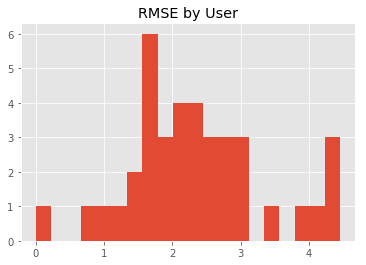

In [76]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']]

plt.hist(rmsevals,bins=20)
plt.title('RMSE by User')
plt.show()

In [77]:
rmse_results['precision_recall_by_user']

regionidcity,cutoff,precision,recall,count
10389.0,1,0.0,0.0,46
10389.0,2,0.0,0.0,46
10389.0,3,0.0,0.0,46
10389.0,4,0.0,0.0,46
10389.0,5,0.0,0.0,46
10389.0,6,0.0,0.0,46
10389.0,7,0.0,0.0,46
10389.0,8,0.0,0.0,46
10389.0,9,0.0,0.0,46
10389.0,10,0.0,0.0,46


In [78]:
import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for see the following URL for the actual equation
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#graphlab.recommender.util.precision_recall_by_user
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.0102339181287,0.0357216132248,0.00258841033726,0.0133951882452
10,0.0102339181287,0.0357216132248,0.00258841033726,0.0133951882452
36,0.0102339181287,0.0357216132248,0.00258841033726,0.0133951882452
26,0.0102339181287,0.0357216132248,0.00258841033726,0.0133951882452
41,0.0102339181287,0.0357216132248,0.00258841033726,0.0133951882452
3,0.0175438596491,0.0744322927565,0.00246427925484,0.0133967436334
1,0.0263157894737,0.160072698166,0.000271296798698,0.00165023400171
6,0.0131578947368,0.0449427665174,0.00258841033726,0.0133951882452
11,0.0102339181287,0.0357216132248,0.00258841033726,0.0133951882452
2,0.0263157894737,0.111648439135,0.00246427925484,0.0133967436334


In [79]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="regionidcity", 
                                  item_id="propertylandusetypeid", 
                                  target="bedroomcnt")

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 87949 observations with 177 users and 14 items.

Data prepared in: 0.095022s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10993 / 87949 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 2.10993                                  |

| 5       | 0.0488281         | 1.55812                                  |

| 6       | 0.0244141         | 1.61818                                  |

| 7       | 0.012207          | 2.2519                                   |

| 8       | 0.00610352        | 2.22114                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0488281         | 1.55812                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 103us        | 2.61375           | 1.15466               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 76.158ms     | 1.02733           | 1.00739               | 0.0488281   |

| 2       | 170.09ms     | 0.971808          | 0.98149               | 0.0290334   |

| 3       | 284.665ms    | 0.938165          | 0.96463               | 0.0214205   |

| 4       | 358.569ms    | 0.9321            | 0.961311              | 0.0172633   |

| 5       | 464.289ms    | 0.914183          | 0.952746              | 0.014603    |

| 6       | 548.255ms    | 0.908625          | 0.949648              | 0.0127367   |

| 11      | 962.795ms    | 0.889543          | 0.940265              | 0.00808399  |

| 25      | 2.06s        | 0.87332           | 0.932564              | 0.00436732  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.18973

Final training RMSE: 0.940195


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0526315789474 | 0.00246427925484 |
|   2    | 0.0263157894737 | 0.00246427925484 |
|   3    | 0.0175438596491 | 0.00246427925484 |
|   4    | 0.0131578947368 | 0.00246427925484 |
|   5    | 0.0157894736842 | 0.00258841033726 |
|   6    | 0.0131578947368 | 0.00258841033726 |
|   7    | 0.0119047619048 | 0.00258841033726 |
|   8    | 0.0109649122807 | 0.00258841033726 |
|   9    | 0.0102339181287 | 0.00258841033726 |
|   10   | 0.0102339181287 | 0.00258841033726 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.9277340739756781)

Per User RMSE (best)
+--------------+-------+----------------+
| regionidcity | count |      rmse      |
+--------------+-------+----------------+
|   32927.0    |   2   | 0.499891249012 |
+--------------+-------

In [28]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.011568986569,0.0349936958244,0.00214602935191,0.00695879467954
10,0.0119963369963,0.0359560241782,0.00214602935191,0.00695879467954
36,0.011568986569,0.0349936958244,0.00214602935191,0.00695879467954
26,0.011568986569,0.0349936958244,0.00214602935191,0.00695879467954
41,0.011568986569,0.0349936958244,0.00214602935191,0.00695879467954
3,0.034188034188,0.101129568942,0.00214602935191,0.00695879467954
1,0.102564102564,0.303388706826,0.00214602935191,0.00695879467954
6,0.017094017094,0.0505647844709,0.00214602935191,0.00695879467954
11,0.0117632367632,0.0354100703656,0.00214602935191,0.00695879467954
2,0.0512820512821,0.151694353413,0.00214602935191,0.00695879467954


In [80]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="regionidcity", 
                                  item_id="propertylandusetypeid", 
                                  target="bedroomcnt",
                                  num_factors=11,                 # override the default value
                                  regularization=1e-02,           # override the default value
                                  linear_regularization = 1e-3)   # override the default value

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 87949 observations with 177 users and 14 items.

Data prepared in: 0.091071s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 11       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10993 / 87949 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0837438         | Not Viable                               |

| 1       | 0.020936          | 2.25184                                  |

| 2       | 0.010468          | 2.26254                                  |

| 3       | 0.00523399        | 2.30323                                  |

| 4       | 0.00261699        | 2.36264                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.020936          | 2.25184                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 79us         | 2.61375           | 1.15466               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 129.043ms    | DIVERGED          | DIVERGED              | 0.020936    |

| RESET   | 160.616ms    | 2.61305           | 1.1545                |             |

| 1       | 286.818ms    | DIVERGED          | DIVERGED              | 0.010468    |

| RESET   | 323.005ms    | 2.61315           | 1.1545                |             |

| 1       | 459.72ms     | DIVERGED          | DIVERGED              | 0.00523399  |

| RESET   | 494.924ms    | 2.61309           | 1.15444               |             |

| 1       | 564.902ms    | 1.22245           | 0.991362              | 0.00261699  |

| 2       | 641.042ms    | 1.0918            | 0.976383              | 0.000792639 |

| 3       | 708.276ms    | 1.05904           | 0.974947              | 0.00046705  |

| 4       | 781.406ms    | 1.04916           | 0.975707              | 0.000331061 |

| 5       | 866.912ms    | 1.04513           | 0.976427              | 0.000256405 |

| 6       | 936.094ms    | 1.04349           | 0.976921              | 0.000209224 |

| 11      | 1.31s        | 1.0362            | 0.977248              | 0.000108968 |

| 22      | 2.10s        | 1.03336           | 0.977626              | 5.11507e-05 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 2.2782

Final training RMSE: 0.978574


Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    | 0.0263157894737 | 0.000271296798698 |
|   2    | 0.0263157894737 |  0.00246427925484 |
|   3    | 0.0175438596491 |  0.00246427925484 |
|   4    | 0.0131578947368 |  0.00246427925484 |
|   5    | 0.0157894736842 |  0.00258841033726 |
|   6    | 0.0131578947368 |  0.00258841033726 |
|   7    | 0.0119047619048 |  0.00258841033726 |
|   8    | 0.0109649122807 |  0.00258841033726 |
|   9    | 0.0102339181287 |  0.00258841033726 |
|   10   | 0.0102339181287 |  0.00258841033726 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.0226494171695704)

Per User RMSE (best)
+--------------+-------+----------------+
| regionidcity | count |      rmse      |
+--------------+-------+----------------+
|   32927.0    |   2   | 0.243313433115 |
+--------

In [81]:
comparison = gl.recommender.util.compare_models(test, [item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    | 0.0263157894737 | 0.000271296798698 |
|   2    | 0.0263157894737 |  0.00246427925484 |
|   3    | 0.0175438596491 |  0.00246427925484 |
|   4    | 0.0197368421053 |  0.00258841033726 |
|   5    | 0.0157894736842 |  0.00258841033726 |
|   6    | 0.0131578947368 |  0.00258841033726 |
|   7    | 0.0119047619048 |  0.00258841033726 |
|   8    | 0.0109649122807 |  0.00258841033726 |
|   9    | 0.0102339181287 |  0.00258841033726 |
|   10   | 0.0102339181287 |  0.00258841033726 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 2.313234162829496)

Per User RMSE (best)
+--------------+-------+------+
| regionidcity | count | rmse |
+--------------+-------+------+
|   24797.0    |   1   | 0.0  |
+--------------+------

In [82]:
 comparisonstruct = gl.compare(test,[item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    | 0.0263157894737 | 0.000271296798698 |
|   2    | 0.0263157894737 |  0.00246427925484 |
|   3    | 0.0175438596491 |  0.00246427925484 |
|   4    | 0.0197368421053 |  0.00258841033726 |
|   5    | 0.0157894736842 |  0.00258841033726 |
|   6    | 0.0131578947368 |  0.00258841033726 |
|   7    | 0.0119047619048 |  0.00258841033726 |
|   8    | 0.0109649122807 |  0.00258841033726 |
|   9    | 0.0102339181287 |  0.00258841033726 |
|   10   | 0.0102339181287 |  0.00258841033726 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------

In [83]:
gl.show_comparison(comparisonstruct,[item_item, rec1])

In [84]:
params = {'user_id': 'regionidcity', 
          'item_id': 'propertylandusetypeid', 
          'target': 'bedroomcnt',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-13-2017-19-20-0600000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-13-2017-19-20-0600000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-13-2017-19-20-0600000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-13-2017-19-20-0600000-0ed8c'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-13-2017-19-20-0600000-0ed8c' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-13-2017-19-20-0600000-0ed8c' scheduled.


In [93]:
job.get_status()

{'Canceled': 0, 'Completed': 5, 'Failed': 0, 'Pending': 0, 'Running': 0}

In [94]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...
1,propertylandusetypeid,0.001,25,24,4
0,propertylandusetypeid,0.001,25,32,4
3,propertylandusetypeid,0.001,25,12,8
2,propertylandusetypeid,0.001,25,24,4
4,propertylandusetypeid,0.001,25,24,4
ranking_regularization,regularization,target,user_id,training_precision@5,training_recall@5
0.5,0.001,bedroomcnt,regionidcity,0.620338983051,0.0556578351524
0.25,0.001,bedroomcnt,regionidcity,0.611299435028,0.0554805855759
0.1,0.001,bedroomcnt,regionidcity,0.587570621469,0.0550779878993
0.25,0.001,bedroomcnt,regionidcity,0.609039548023,0.0553596936112


In [95]:
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'propertylandusetypeid',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 12,
 'num_sampled_negative_examples': 8,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'bedroomcnt',
 'user_id': 'regionidcity'}

In [96]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : regionidcity
 Item ID                          : propertylandusetypeid
 Target                           : bedroomcnt
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 87949
 Number of users                  : 177
 Number of items                  : 14
 
 Training summary
 ----------------
 Training time                    : 4.4606
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 32
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 25
 
 Regularization Settings
 -----------------------
 regularization          

In [39]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0512820512821 | 0.00132275132275 |
|   2    |  0.025641025641 | 0.00132275132275 |
|   3    |  0.017094017094 | 0.00132275132275 |
|   4    | 0.0192307692308 | 0.0018255165314  |
|   5    | 0.0205128205128 | 0.00214602935191 |
|   6    |  0.017094017094 | 0.00214602935191 |
|   7    |  0.014652014652 | 0.00214602935191 |
|   8    | 0.0132783882784 | 0.00214602935191 |
|   9    | 0.0125661375661 | 0.00214602935191 |
|   10   | 0.0119963369963 | 0.00214602935191 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|  

In [96]:
list(dfZillowDataNumeric)

['parcelid',
 'logerror',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollar